# i. Introduction

Nama        : Amelia Puspita Sari

Batch       : RMT-30

Objectives  : melihat harga akomodasi di airbnb New York, USA menggunakan prediksi machine learning.

machine learning yang akan digunakan adalah KNN, SVM, Decision Tree, Random Forest, dan XGB. nantinya akan dipilih salah satu model yang menghasilkan akurasi tertinggi.



# ii. Import libraries

In [56]:
# untuk data loading 
import pandas as pd

# untuk visualisasi di EDA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# untuk FE 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from scipy.sparse import csr_matrix
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline

# model training
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# model evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor

# iii. Data loading

In [3]:
# Load dataset
df_org = pd.read_csv('AB_NYC_2019.csv')

# Duplicate dataset
df = df_org.copy()

In [4]:
# tampilkan 10 data teratas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [14]:
# tampilkan 10 data terbawah
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# iv. EDA

## initial insight 

In [5]:
# info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [16]:
# cek berapa kolom dan baris
df.shape

(48895, 16)

In [3]:
# cek missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#cek duplikat data
df.duplicated().sum()

0

- terdapat 48.895 baris dan 16 kolom dalam dataset ini
- tidak ada data duplikat
- terdapat missing values di name sebanyak 16, host name sebanyak 21, last review dan reviews per month sebanyak 10.052
- dataset terdiri dari 10 kolom numerik dan 6 kolom kategorik

berdasarkan hasil eksplorasi sederhana, untuk kolom "name" dan "host_name" tidak signifikan untuk analisis data. 

sementara kolom "last_review" dan "review_per_month" butuh handling missing values. pada kolom "last_review" adalah tanggal terakhir review, jika tidak ada review berarti kosong (0). 

untuk "review_per_month" adalah review dari user, jika tidak ada review berarti kosong (0).

## visualisasi data

In [6]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Text(0.5, 1.0, 'Neighbourhood Group')

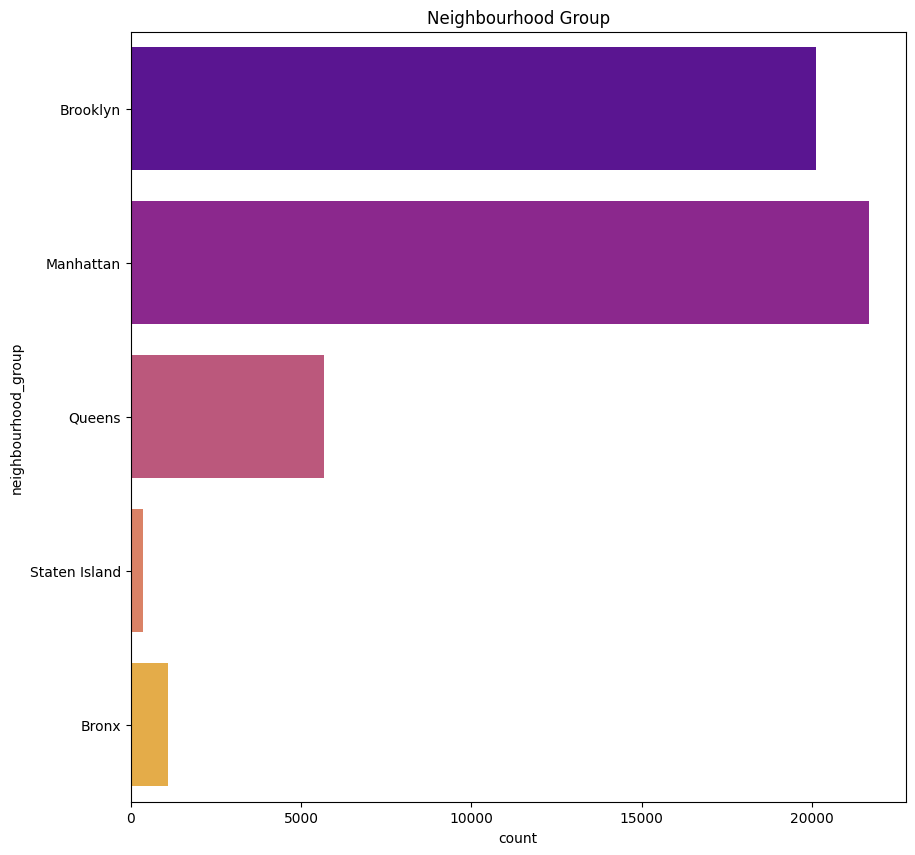

In [17]:
sns.countplot(df['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

In [9]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Distribution of Room Types')

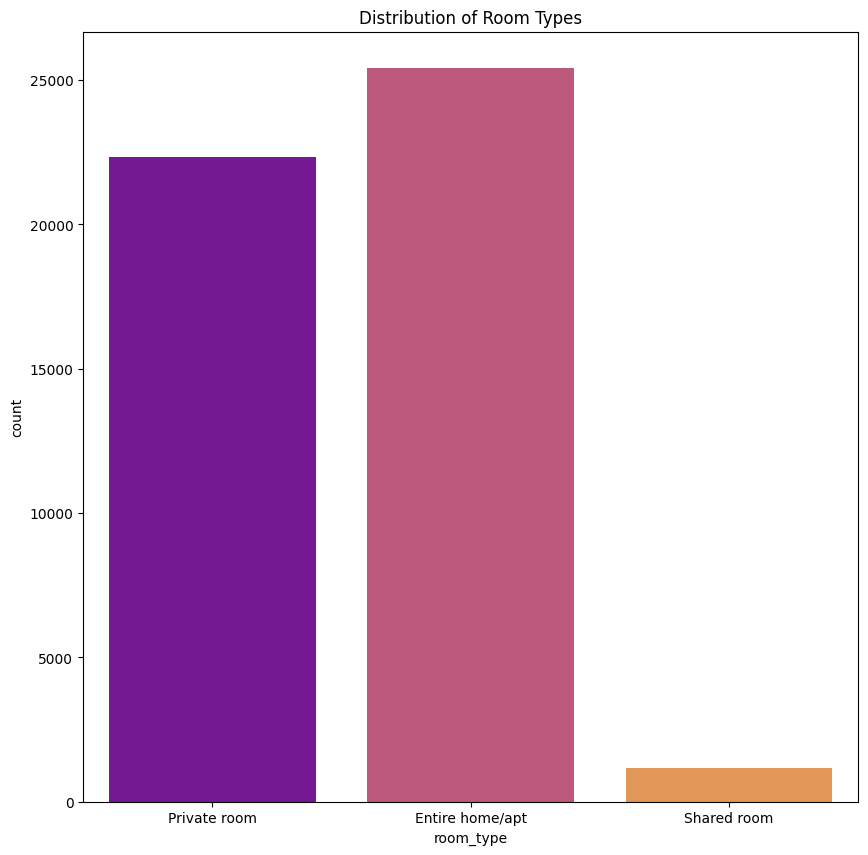

In [18]:
sns.countplot(data=df, x='room_type', palette="plasma", legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Distribution of Room Types')

In [76]:
#finding out top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

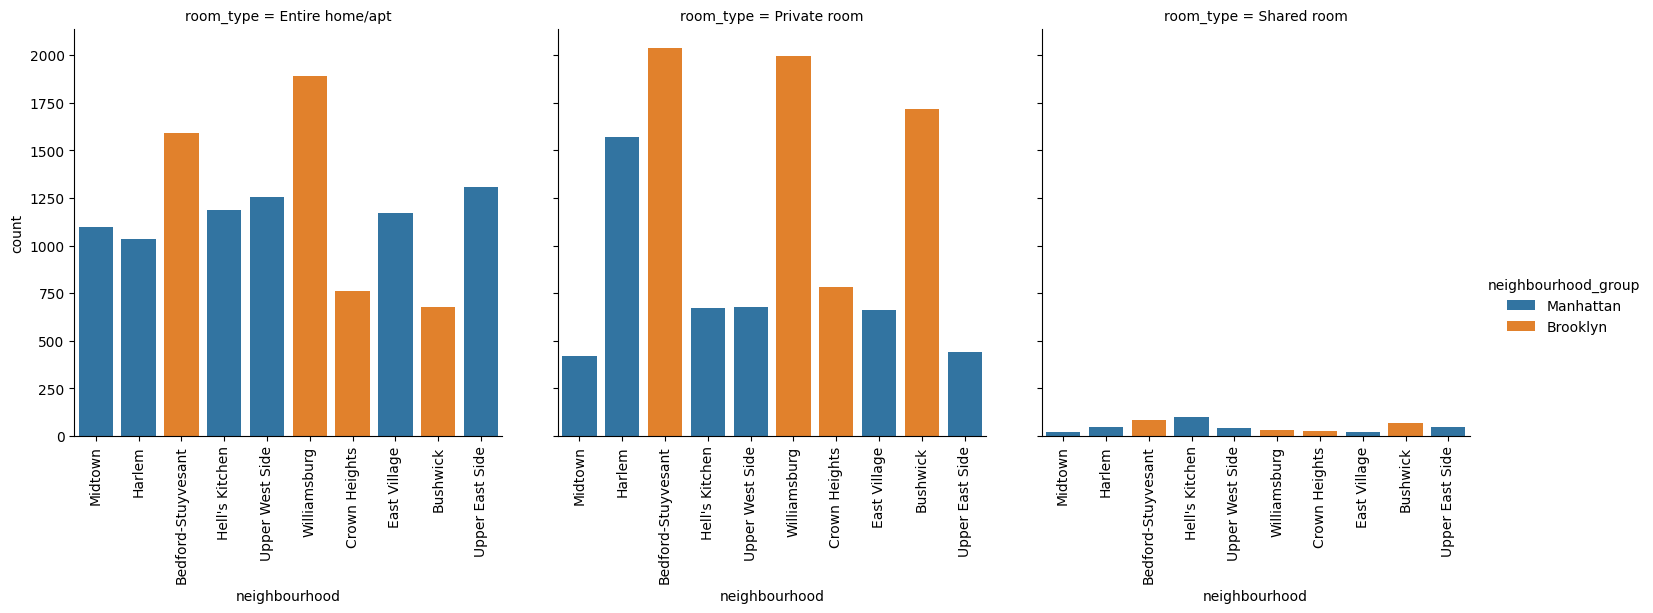

In [11]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In [12]:
# 10 most reviewed listings in NYC
top_reviewed_listings = df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [19]:
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


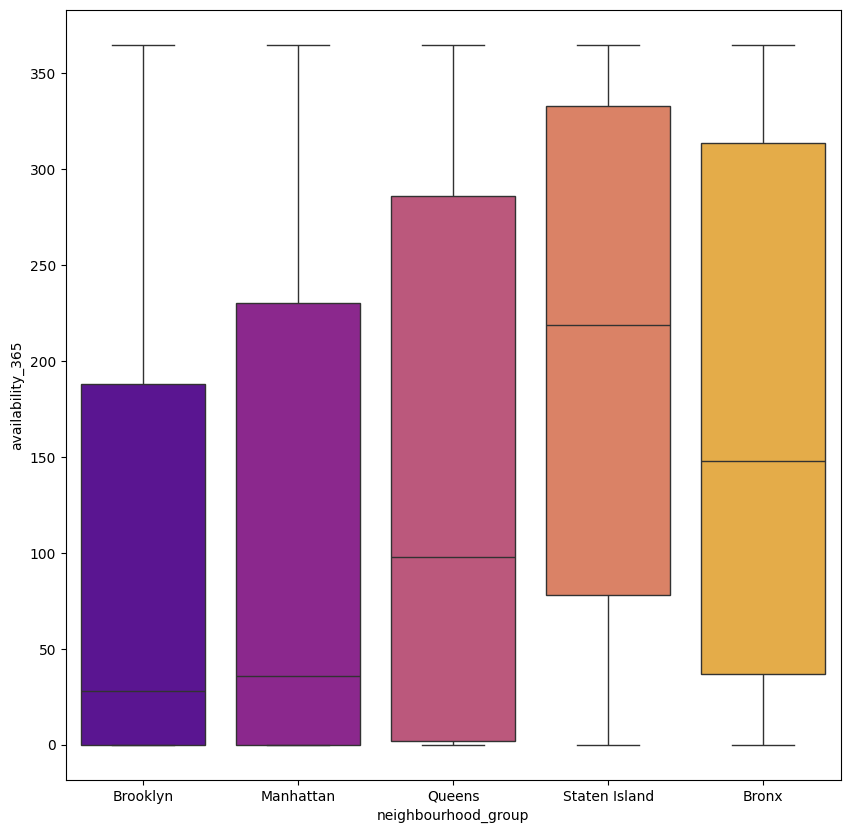

In [20]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(data = df, x = 'neighbourhood_group', y = 'availability_365', palette = 'plasma')

In [21]:
# fungsi untuk visualisasi distribusi dan outlier dengan histogram dan boxplot

def diagnostic_plots(df):
    # Filter hanya kolom numerik
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Loop melalui setiap kolom numerik dan membuat histogram dan boxplot
    for column in numeric_columns:
        # figure size
        plt.figure(figsize=(16, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30)
        plt.title(f'Histogram of {column}')

        # boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column}')

        plt.show()

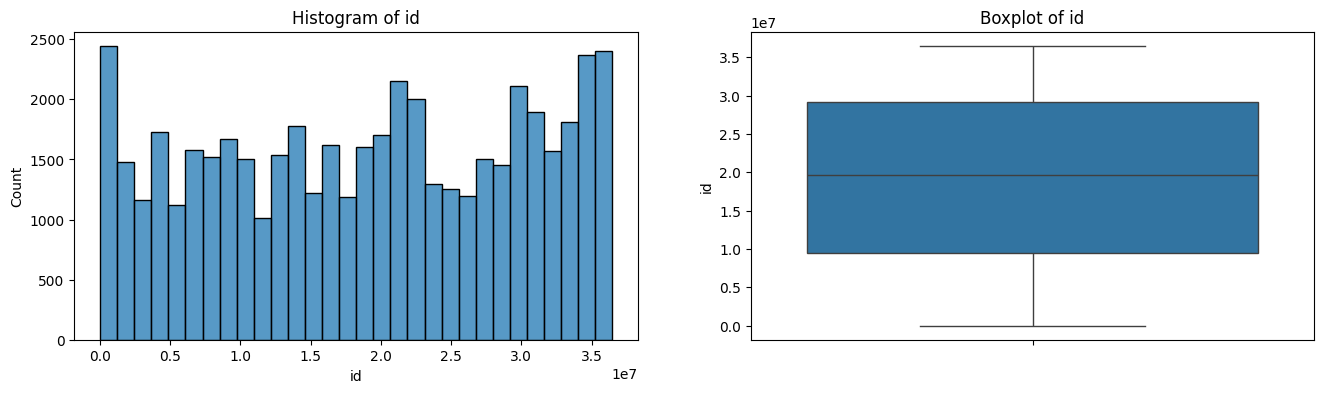

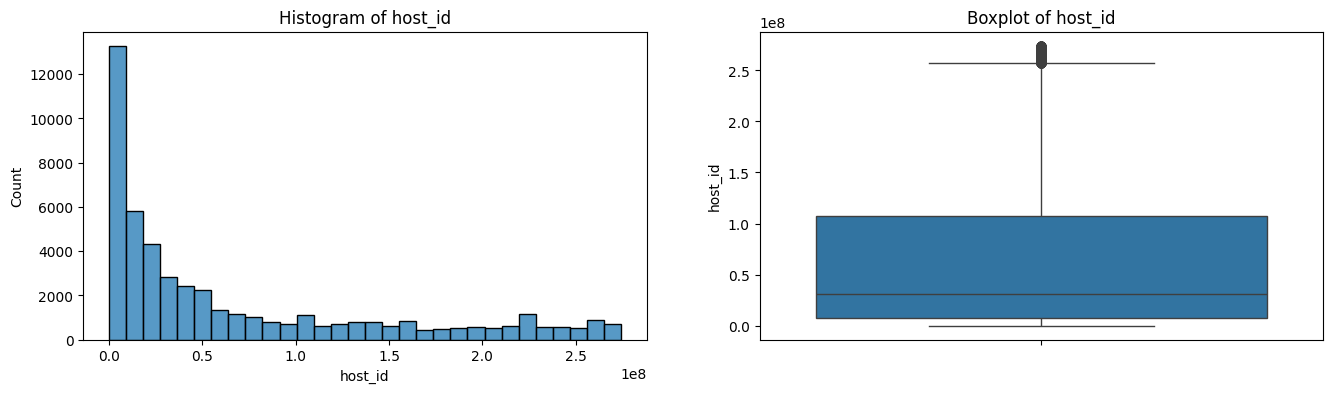

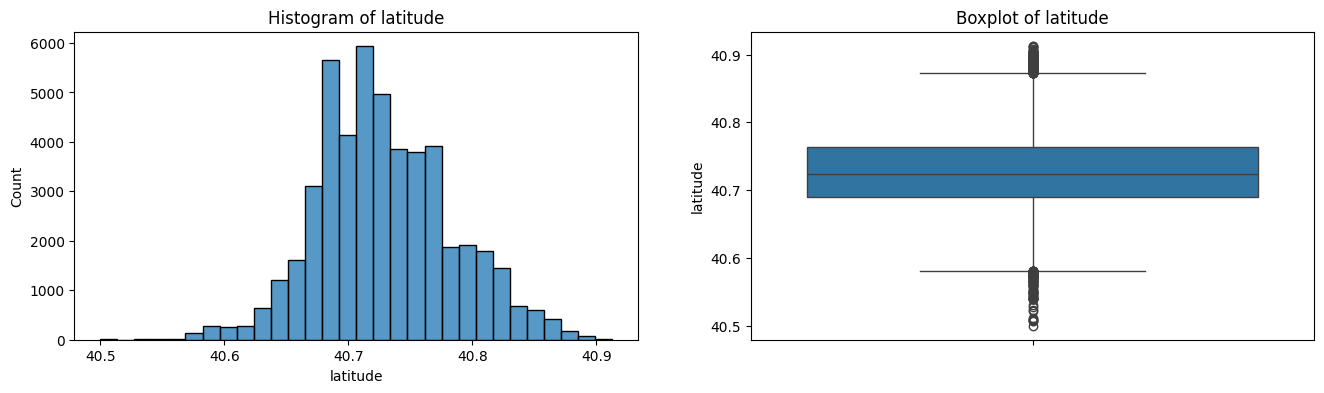

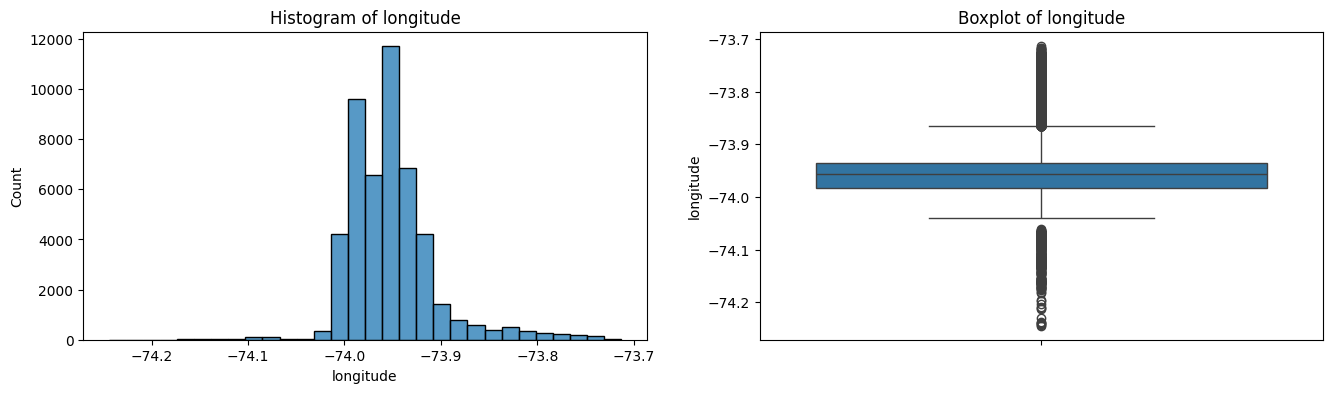

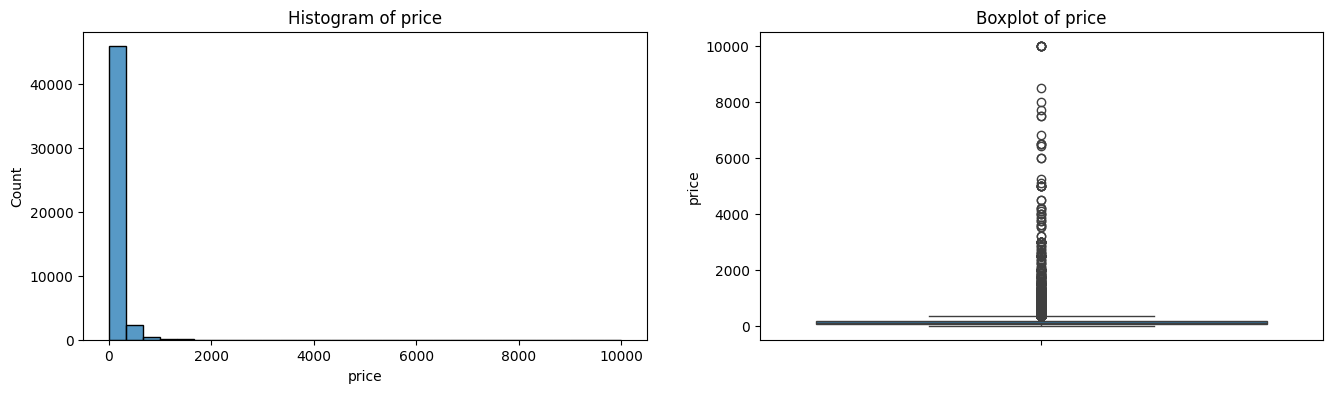

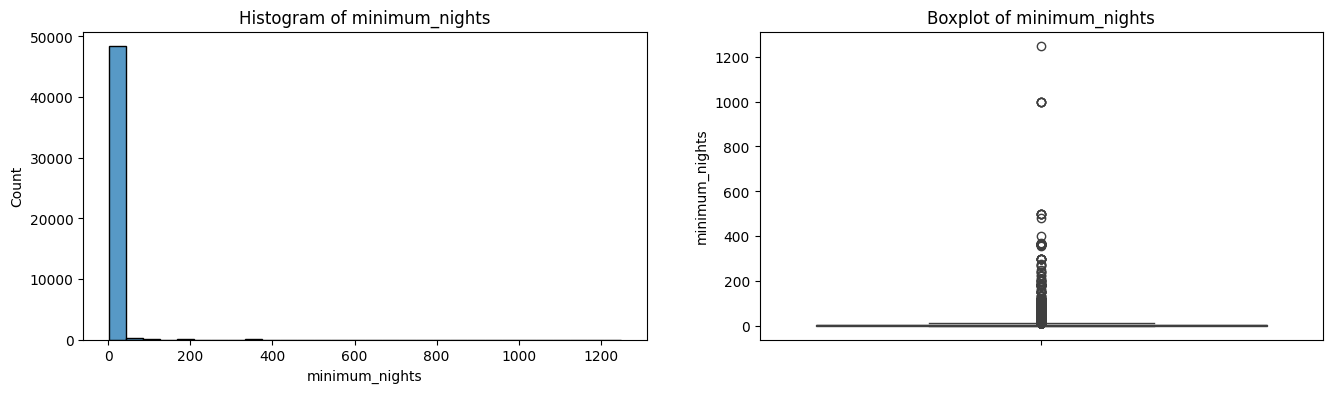

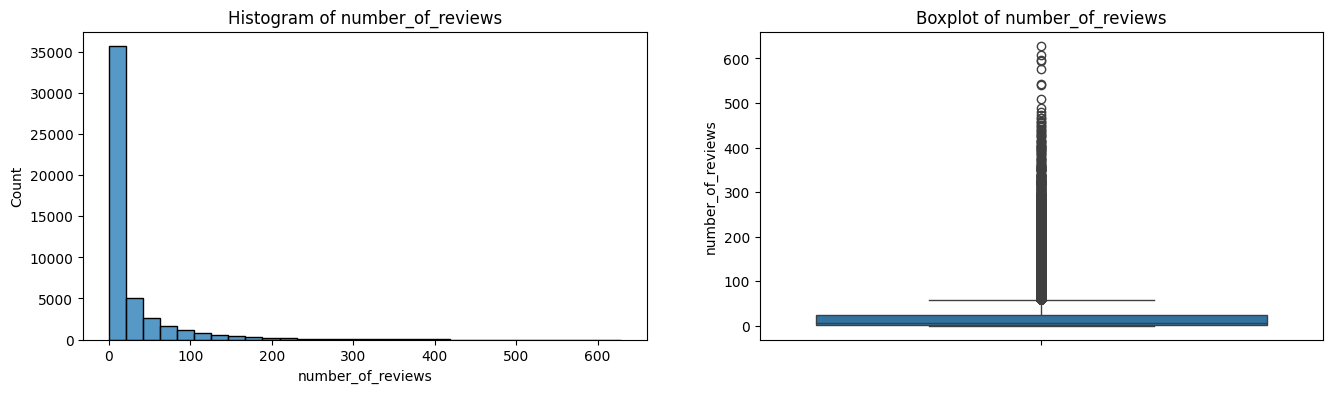

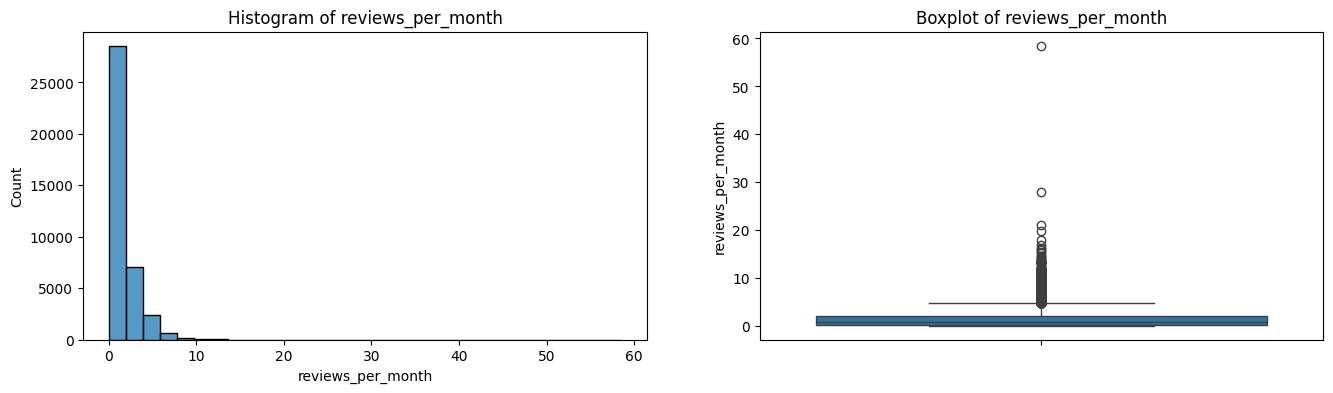

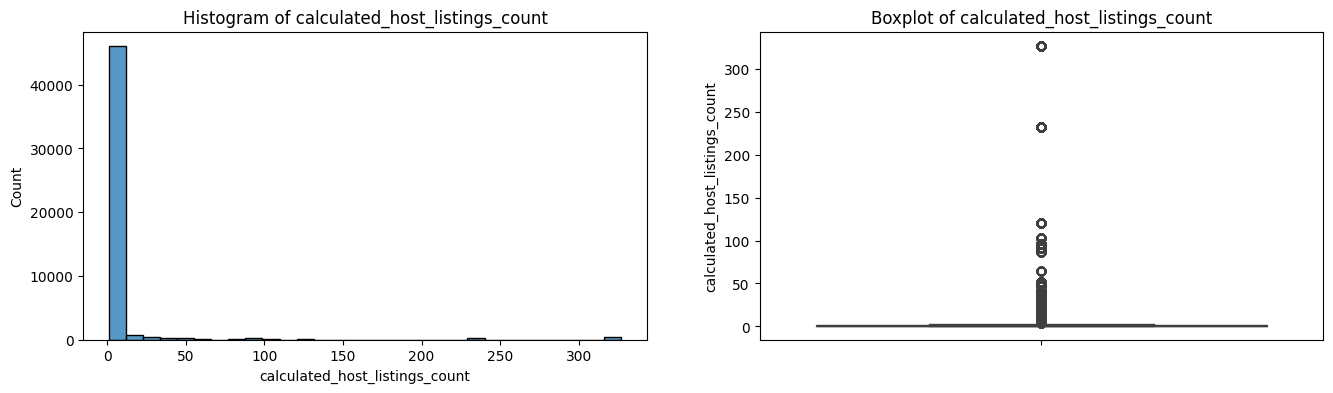

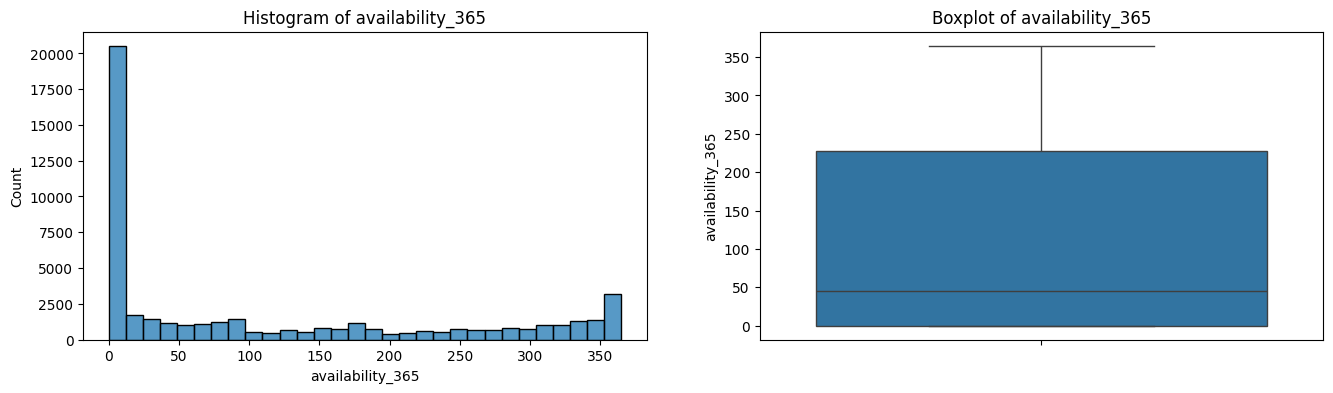

In [22]:
# visualisasi kolom skewed dengan boxplot dan histogram

diagnostic_plots(df)

## cek cardinality

In [5]:
# kolom kategorikal
categorical_columns = df.select_dtypes(include=['object'])

# print cardinality untuk kolom kategorikal
print("\nCardinality for categorical columns:")
print(categorical_columns.nunique())


Cardinality for categorical columns:
name                   47905
host_name              11452
neighbourhood_group        5
neighbourhood            221
room_type                  3
last_review             1764
dtype: int64


name, host_name dan last_review memiliki cardinality yang tinggi 

# v. FE

## drop kolom tidak terpakai

In [4]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [5]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## split x dan y

In [6]:
# assign kolom price sebagai target (y)
y = df['price']

# pisah kolom price dari X dengan drop
x = df.drop('price', axis=1)  

# pisah menjadi train set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [7]:
print('Train Size :', x_train.shape)
print('Test Size :', x_test.shape)
x_train.head()

Train Size : (39116, 11)
Test Size : (9779, 11)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
28691,22866437,Manhattan,Upper West Side,40.77838,-73.97851,Entire home/apt,3,0,NaN,2,0
7479,329917,Brooklyn,Greenpoint,40.72905,-73.95755,Private room,2,5,0.13,1,0
41192,240239465,Queens,St. Albans,40.70132,-73.75463,Entire home/apt,2,11,2.32,2,230
7658,21191263,Manhattan,East Village,40.72915,-73.98866,Entire home/apt,1,1,0.02,1,0
3697,11371978,Manhattan,Midtown,40.76402,-73.97770,Entire home/apt,4,0,NaN,1,0


In [8]:
#numerik dan kategorik

num_columns = x_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = x_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical Columns:  ['neighbourhood_group', 'neighbourhood', 'room_type']


## handling outlier

In [9]:
num_cols = list(x_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, x_train[col].skew()])

pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness'], data= listItem)

,Nama Kolom,Nilai Skewness
0,host_id,1.207713
1,latitude,0.238946
2,longitude,1.289932
3,minimum_nights,22.898917
4,number_of_reviews,3.708218
5,reviews_per_month,3.350294
6,calculated_host_listings_count,8.031110
7,availability_365,0.767305


distribusi normal:

- latitude 

distribusi skew:

- host_id
- longitude 
- minimum_nights 
- number_of_reviews 
- reviews_per_month 
- calculated_host_listings_count 
- availability_365 

In [10]:
num_train = x_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column host_id outliers = 3.12%
Column latitude outliers = 0.84%
Column longitude outliers = 5.78%
Column minimum_nights outliers = 13.45%
Column number_of_reviews outliers = 12.32%
Column reviews_per_month outliers = 3.69%
Column calculated_host_listings_count outliers = 14.31%
Column availability_365 outliers = 0.00%


untuk kolom minimun_nights, number_of_reviews, dan calculated_host_listings_count mempunyai outlier ekstrim (lebih dari 5%).

In [11]:
# capping distribusi normal 
winsorizer1 = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3, 
                            variables=['latitude', 'availability_365', 'reviews_per_month'],
                            missing_values='ignore')

x_train_capped = winsorizer1.fit_transform(x_train)
x_test_capped = winsorizer1.transform(x_test)

In [12]:
# capping kedua untuk skew
winsorizer2 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3, 
                            variables=['host_id', 'longitude', 'minimum_nights', 'number_of_reviews',
                                       'calculated_host_listings_count'],
                            missing_values='ignore')

x_train_cap = winsorizer2.fit_transform(x_train_capped)
x_test_cap = winsorizer2.transform(x_test_capped)

In [13]:
x_train_cap

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
28691,22866437,Manhattan,Upper West Side,40.77838,-73.978510,Entire home/apt,3,0,NaN,2,0
7479,329917,Brooklyn,Greenpoint,40.72905,-73.957550,Private room,2,5,0.13,1,0
41192,240239465,Queens,St. Albans,40.70132,-73.795223,Entire home/apt,2,11,2.32,2,230
7658,21191263,Manhattan,East Village,40.72915,-73.988660,Entire home/apt,1,1,0.02,1,0
3697,11371978,Manhattan,Midtown,40.76402,-73.977700,Entire home/apt,4,0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32081,133658348,Manhattan,Harlem,40.80670,-73.944810,Entire home/apt,2,8,0.59,1,35
7259,5734689,Manhattan,Gramercy,40.73627,-73.980200,Entire home/apt,2,13,0.25,1,10
21584,55198931,Brooklyn,Flatbush,40.64774,-73.965170,Private room,2,12,0.44,1,294
36543,8185593,Brooklyn,Williamsburg,40.70951,-73.954430,Private room,3,1,0.12,1,8


### transformasi log

mengurangi outlier ekstrim dan lebih mendekatkan ke distribusi normal.

In [10]:
x_train['minimum_nights'] = np.log1p(x_train['minimum_nights'])
x_train['number_of_reviews'] = np.log1p(x_train['number_of_reviews'])
x_train['reviews_per_month'] = np.log1p(x_train['reviews_per_month'])
x_train['calculated_host_listings_count'] = np.log1p(x_train['calculated_host_listings_count'])

In [17]:
x_test['minimum_nights'] = np.log1p(x_test['minimum_nights'])
x_test['number_of_reviews'] = np.log1p(x_test['number_of_reviews'])
x_test['reviews_per_month'] = np.log1p(x_test['reviews_per_month'])
x_test['calculated_host_listings_count'] = np.log1p(x_test['calculated_host_listings_count'])

### transformasi root

kurang drastis daripada loga dan lebih cocok untuk distribusi yang tidak terlalu skewed

In [11]:
x_train['availability_365'] = np.sqrt(x_train['availability_365'])
x_train['latitude'] = np.sqrt(x_train['latitude'])
x_train['host_id'] = np.sqrt(x_train['host_id'])

In [19]:
x_test['availability_365'] = np.sqrt(x_test['availability_365'])
x_test['latitude'] = np.sqrt(x_test['latitude'])
x_test['host_id'] = np.sqrt(x_test['host_id'])

### before-after

In [12]:
skewness_after = x_train[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'latitude', 'host_id']].skew()
print(skewness_after)

minimum_nights                    1.511181
number_of_reviews                 0.359214
reviews_per_month                 0.720332
calculated_host_listings_count    3.287730
availability_365                  0.274696
latitude                          0.236853
host_id                           0.576825
dtype: float64


host_id - Before Capping


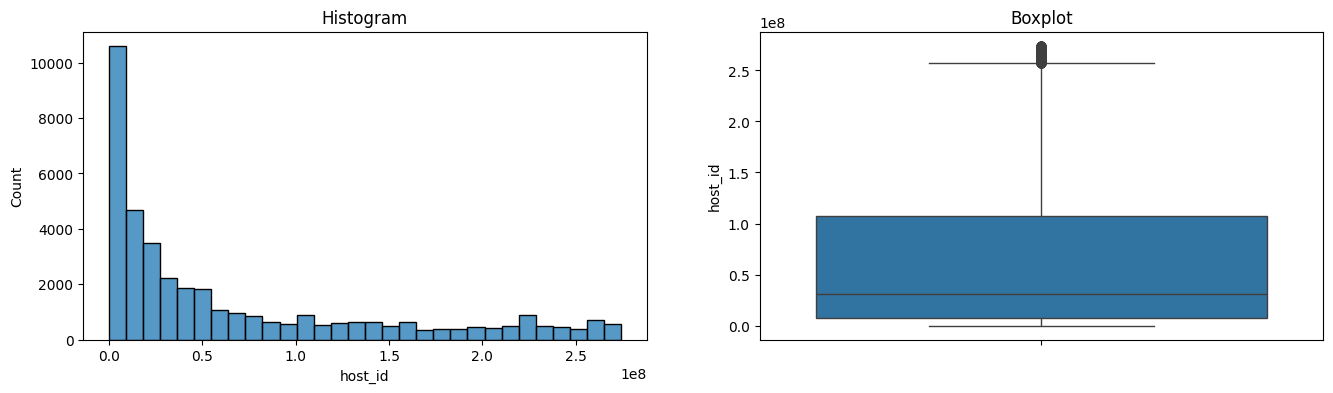


host_id - After Capping


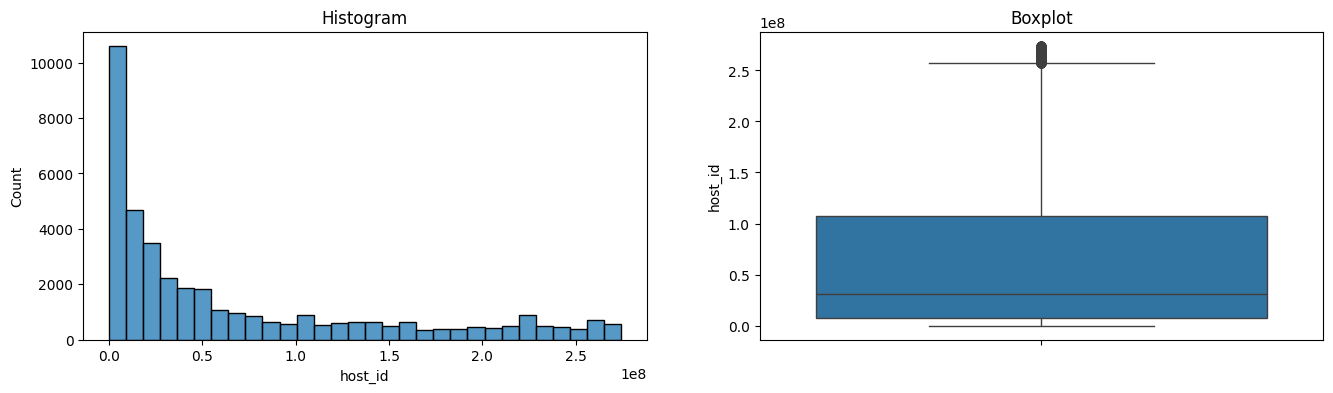

latitude - Before Capping


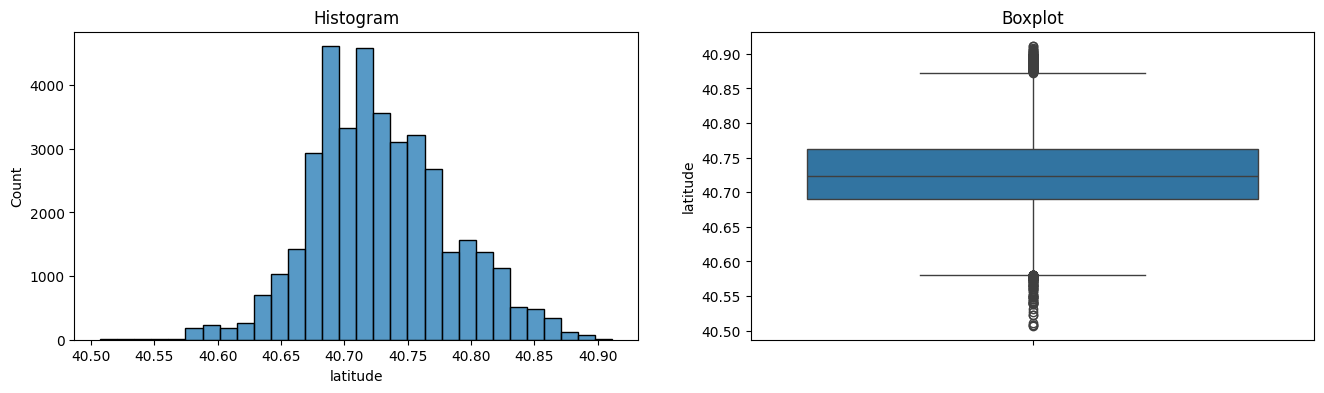


latitude - After Capping


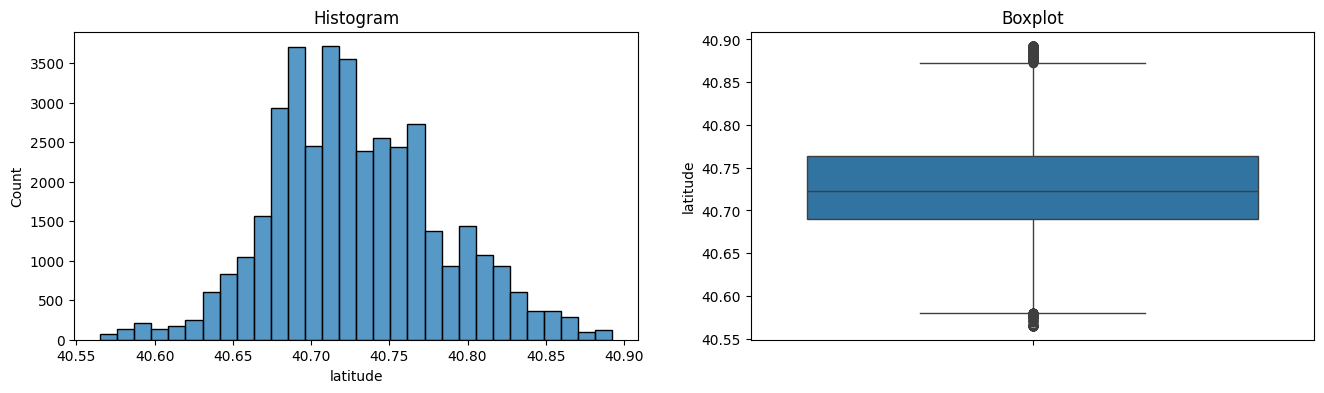

longitude - Before Capping


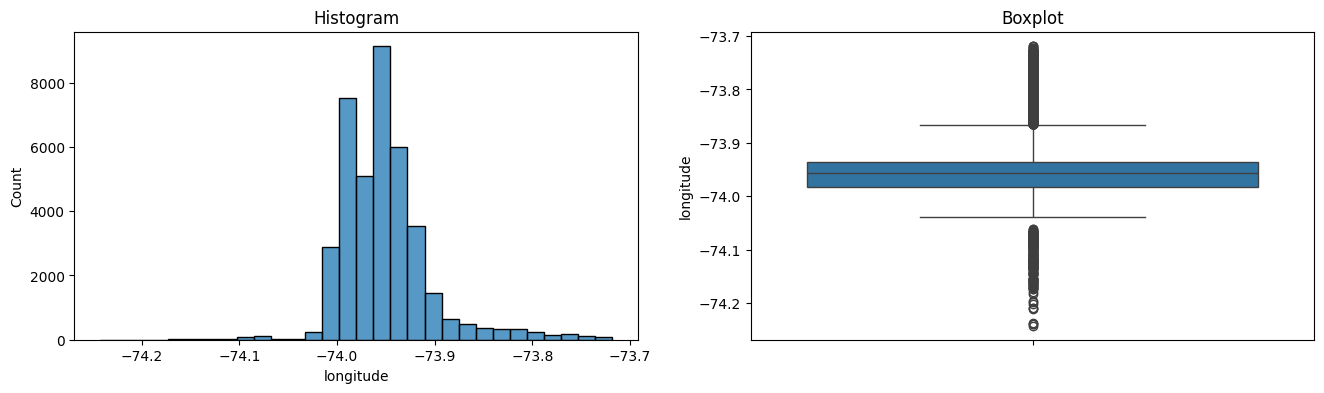


longitude - After Capping


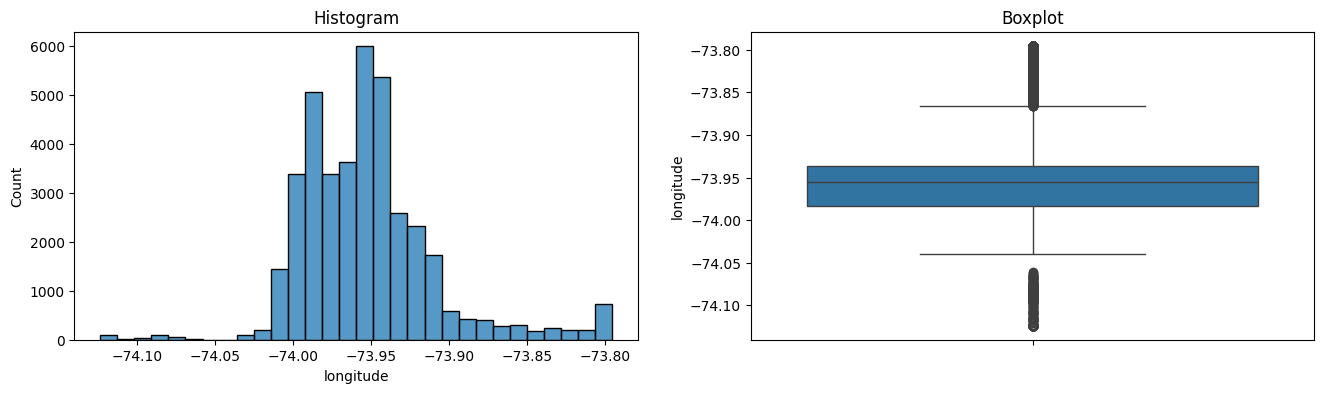

minimum_nights - Before Capping


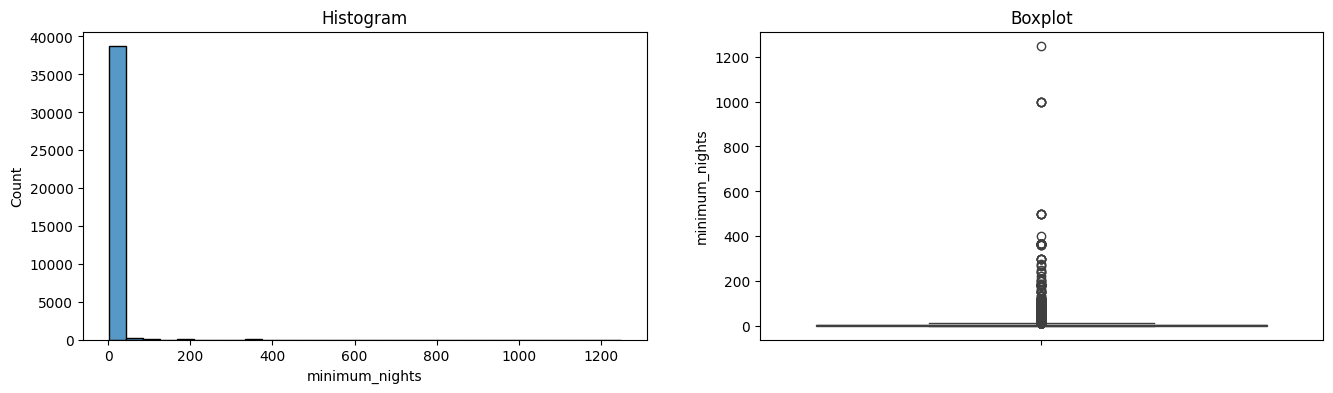


minimum_nights - After Capping


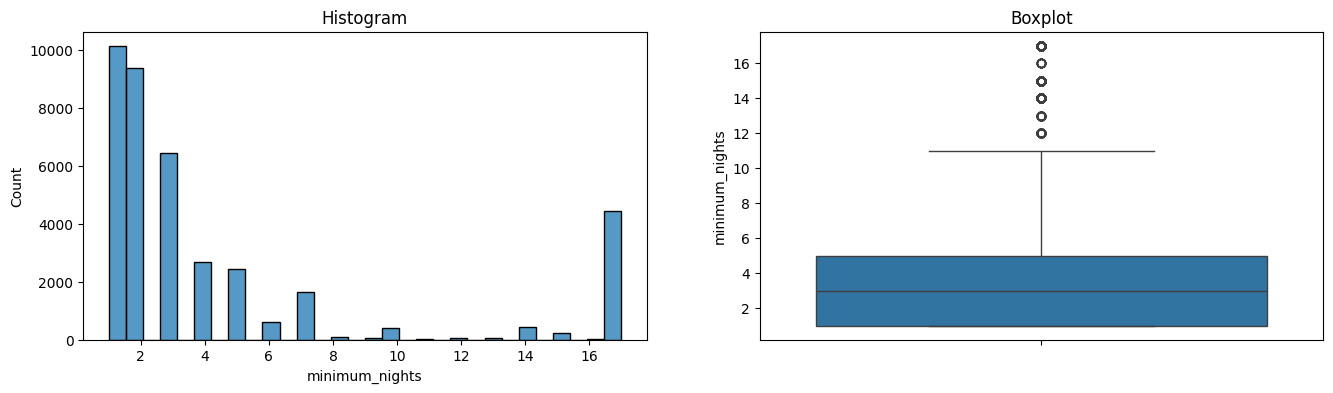

number_of_reviews - Before Capping


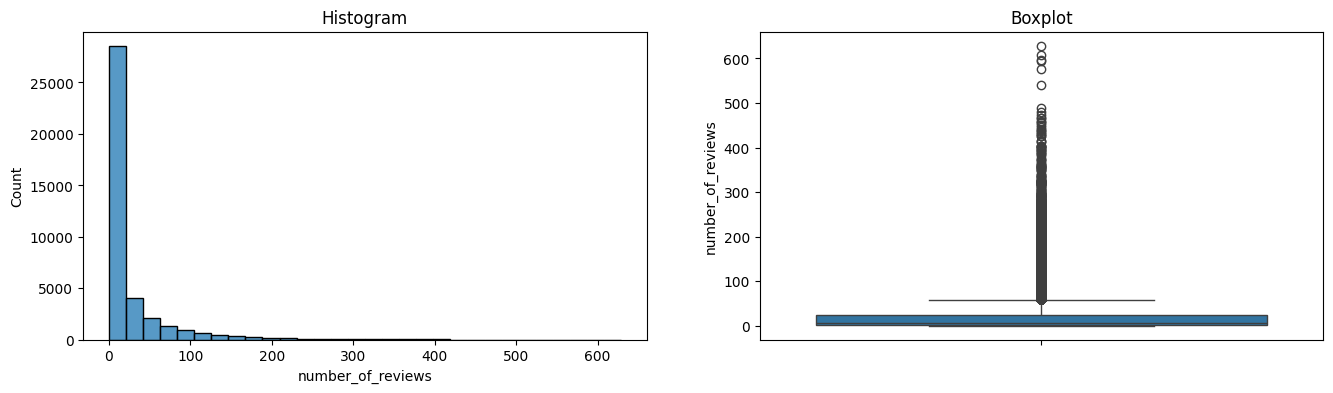


number_of_reviews - After Capping


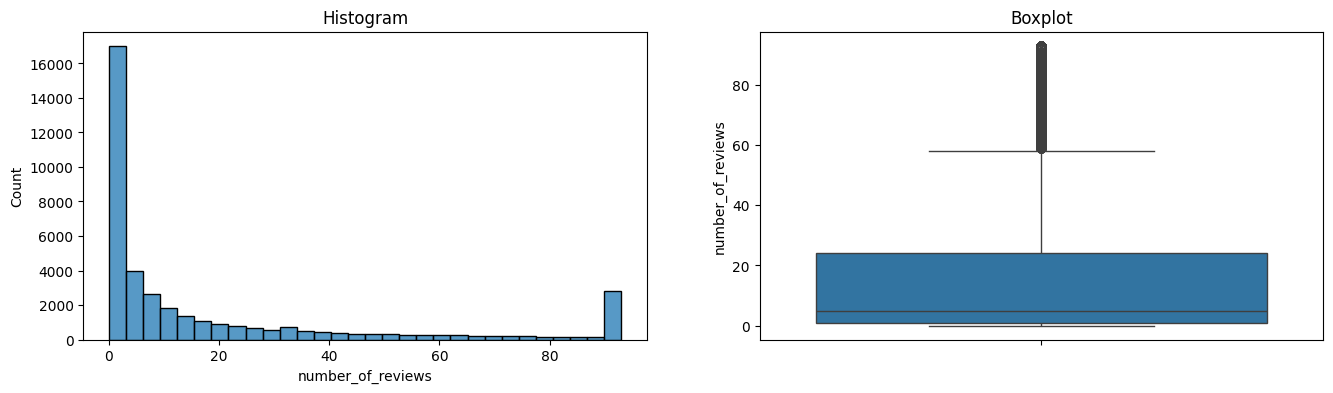

reviews_per_month - Before Capping


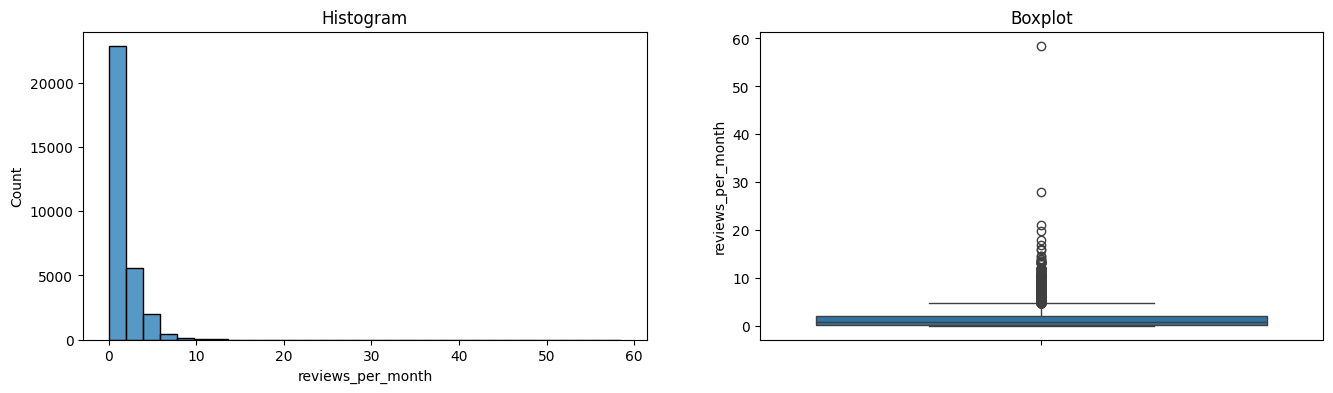


reviews_per_month - After Capping


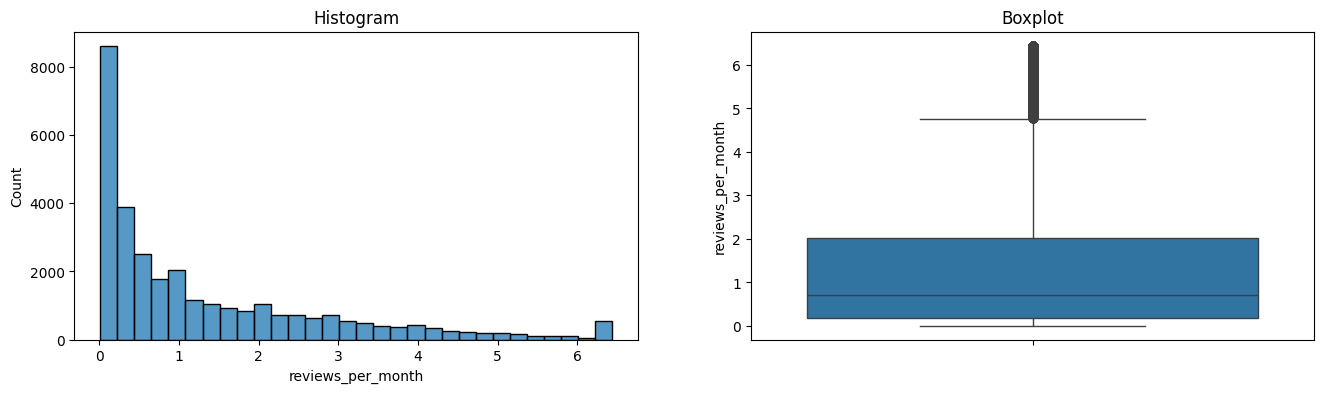

calculated_host_listings_count - Before Capping


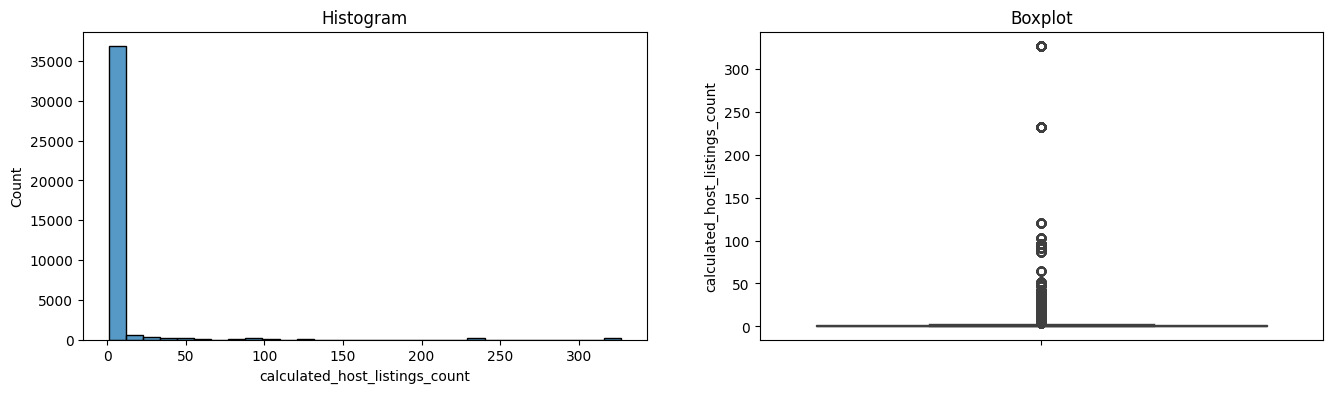


calculated_host_listings_count - After Capping


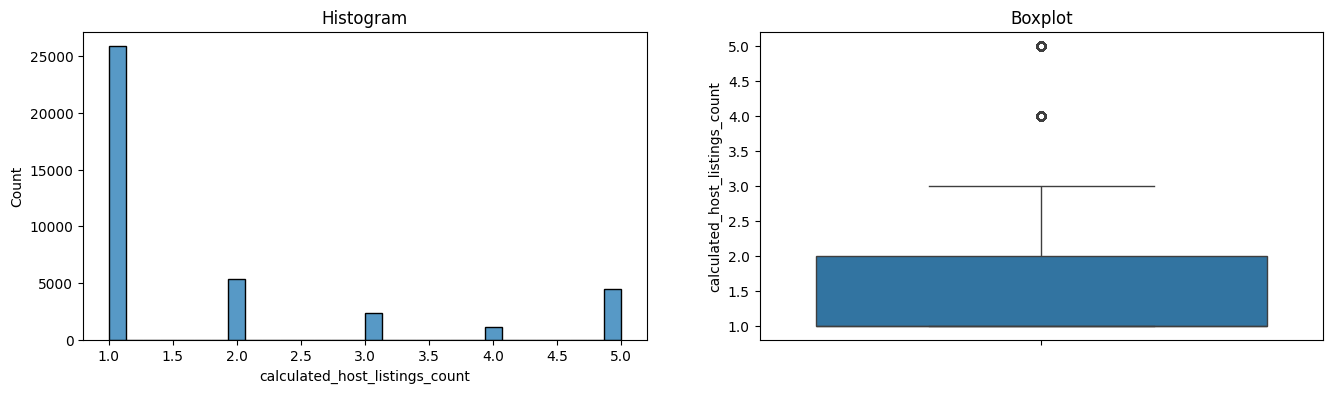

availability_365 - Before Capping


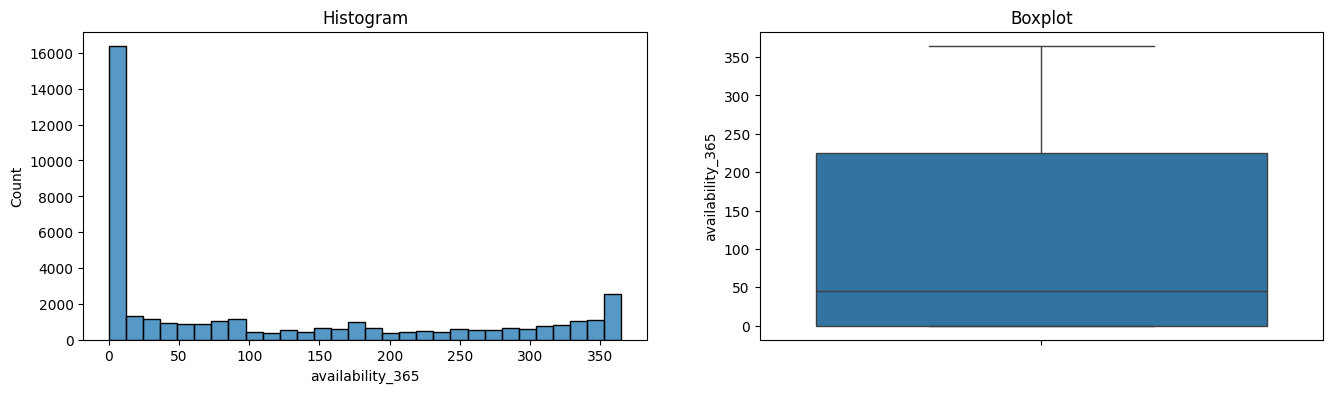


availability_365 - After Capping


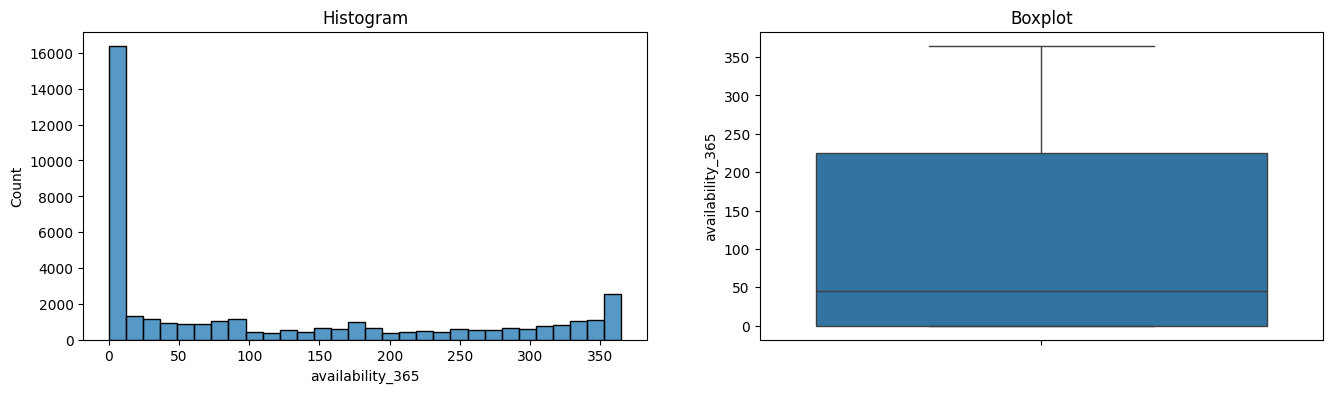

In [15]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# cek sebelum dan sesudah winsorizer
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(x_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(x_train_cap, col)

## handling missing value

In [16]:
x_train_cap.isnull().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 7991
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
x_train_cap.fillna({'reviews_per_month':0}, inplace=True)

In [18]:
x_train_cap.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
x_test_cap.isnull().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2061
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [20]:
x_test_cap.fillna({'reviews_per_month':0}, inplace=True)

In [21]:
x_test_cap.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [22]:
y_train.isnull().sum()

0

In [23]:
y_test.isnull().sum()

0

## column transformer

In [24]:
# Buat transformer untuk data numerik dan kategorikal
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ])

In [25]:
#column transformer untuk preprocessing
transformer = ColumnTransformer([
('scaler', RobustScaler(), selector(dtype_exclude='object')),
('encoding', OneHotEncoder(handle_unknown='ignore'), selector(dtype_include='object'))
])

# vi. Model definition

yang akan digunakan adalah beberapa model regresi dikarenakan akan prediksi harga (data kontinu) seperti linear regression, Decision tree, random forest, XGBoost regressor, KNN regressor dan SVR (super vector regressor).

Conceptual Problems

1. latar belakang adanya bagging dan cara kerja bagging:
bertujuan untuk mengurangi overfitting dan meningkatkan performa prediksi pada model dengan menggabungkan output dari beberapa model yang dilatih.

    cara kerja :

    - bootstrap: mengambil sampel ulang 
    - independent model: melatih model yang sama secara terpisah/independent
    - aggregation on prediction: output dari semua model di-aggregate, misalnya dengan mengambil rata-rata, untuk menghasilkan prediksi akhir yang lebih stabil dan akurat

2. perbedaan cara kerja algoritma Random Forest dengan algoritma boosting (XGBoost regressor):
    - RF membuat tree secara independen, sementara XGBoost membangunnya secara berurutan
    - RF membagi kesalahan secara acak antar tree, sedangkan XGBoost secara spesifik menargetkan kesalahan residual dalam proses pembuatan tree.
    - Performa dan Kecepatan: XGBoost sering lebih cepat dan lebih akurat pada banyak benchmark karena pendekatan yang lebih canggih dalam optimisasi dan penggunaan komputasi paralel.

3. Cross Validation adalah teknik evaluasi kinerja model dengan membagi data menjadi beberapa segment dan melakukan serangkaian tes pada model tersebut. tujuannya adalah untuk menguji model dalam berbagai kondisi train untuk memastikan bahwa model tersebut stabil, terutama untuk menghindari masalah seperti overfit dan untuk memastikan bahwa model memiliki kemampuan generalisasi yang baik pada data yang belum dilihat sebelumnya.


# vii. Model training

In [26]:
# Making pipeline for Linear Regression
pipe_lr = Pipeline([
    ('transformer', transformer),
    ('regressor', LinearRegression())
])

# Making pipeline for Decision Tree Regressor
pipe_dt = Pipeline([
    ('transformer', transformer),
    ('regressor', DecisionTreeRegressor(max_depth=3))
])

# Making pipeline for Random Forest Regressor
pipe_rf = Pipeline([
    ('transformer', transformer),
    ('regressor', RandomForestRegressor())
])

# Making pipeline for XGBoost Regressor
pipe_xgb = Pipeline([
    ('transformer', transformer),
    ('regressor', XGBRegressor())
])

# Making pipeline for KNN Regressor
pipe_knn = Pipeline([
    ('transformer', transformer),
    ('regressor', KNeighborsRegressor())
])

# Making pipeline for SVM Regressor
pipe_svm = Pipeline([
    ('transformer', transformer),
    ('regressor', SVR())
])

# viii. Model evaluation

## Base model evaluation

### a. linear regression

In [28]:
#cek akurasi
pipe_lr.fit(x_train_cap, y_train)
print('Training Score: ',round(pipe_lr.score(x_train_cap, y_train),4))
print('Testing Score: ', round(pipe_lr.score(x_test_cap, y_test),4))

Training Score:  0.1272
Testing Score:  0.0966


model hanya mampu menjelaskan sekitar 13.07% dan 10.12% variabilitas harga airbnb pada train dan test

In [29]:
y_lr_pred = pipe_lr.predict(x_test_cap)
y_lr_pred

array([ 25.31284876, 152.40848418, 246.18784115, ..., 120.36442534,
        76.5012135 , 326.94267819])

In [30]:
y_train_pred = pipe_lr.predict(x_train_cap)
y_test_pred = pipe_lr.predict(x_test_cap)

# Evaluasi model
print("Evaluasi pada Training Set:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared:", r2_score(y_train, y_train_pred))

print("\nEvaluasi pada Testing Set:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared:", r2_score(y_test, y_test_pred))

Evaluasi pada Training Set:
MAE: 70.64877193439752
MSE: 48121.89156173904
RMSE: 219.36702478207394
R-squared: 0.1272236642039355

Evaluasi pada Testing Set:
MAE: 71.7665913571119
MSE: 61266.109845577936
RMSE: 247.51991807848097
R-squared: 0.09659569143209557


berdasarkan evaluasi di atas:

1. nilai MAE, MSE, dan RMSE cukup tinggi menunjukkan bahwa prediksi harga menyimpang dari harga sebenarnya. kemungkinan model mungkin tidak menangkap semua fitur dari dataset

2. r-squared rendah: nilai r-squared untuk train dan test rendah (0.12 dan 0.09 masing-masing), menunjukkan bahwa hanya sebagian kecil variasi dari prediksi harga yang bisa dijelaskan oleh model. kemungkinan besar underfit

In [31]:
# cross-validation
r2_train_cross_val = cross_val_score(pipe_lr,
                                     x_train_cap,
                                     y_train,
                                     cv=3,
                                     scoring="r2")

print('R2 Score - All - Cross Validation  : ', r2_train_cross_val)
print('R2 Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R2 Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R2 Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()), '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))

R2 Score - All - Cross Validation  :  [0.12711101 0.13306748 0.09745209]
R2 Score - Mean - Cross Validation :  0.11921019409557632
R2 Score - Std - Cross Validation  :  0.015576292516435055
R2 Score - Range of Test-Set       :  0.10363390157914126 - 0.13478648661201137


### b. decision tree

In [32]:
#cek akurasi
pipe_dt.fit(x_train_cap, y_train)
print('Training Score: ',round(pipe_dt.score(x_train_cap, y_train),4))
print('Testing Score: ', round(pipe_dt.score(x_test_cap, y_test),4))

Training Score:  0.107
Testing Score:  0.0843


model memiliki performa yang sedikit lebih baik pada train dibandingkan dengan test, tetapi keduanya masih relatif rendah

In [33]:
y_dt_pred = pipe_dt.predict(x_test_cap)
y_dt_pred

array([ 84.83936255, 164.66789744, 242.3346815 , ..., 126.16893733,
        67.86473115, 242.3346815 ])

In [34]:
y_train_pred = pipe_dt.predict(x_train_cap)
y_test_pred = pipe_dt.predict(x_test_cap)

# Evaluasi model
print("Evaluasi pada Training Set:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared:", r2_score(y_train, y_train_pred))

print("\nEvaluasi pada Testing Set:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared:", r2_score(y_test, y_test_pred))

Evaluasi pada Training Set:
MAE: 71.92868786558135
MSE: 49238.462953329166
RMSE: 221.89741538226434
R-squared: 0.10697265045156734

Evaluasi pada Testing Set:
MAE: 72.24150104272502
MSE: 62096.67049394785
RMSE: 249.19203537422268
R-squared: 0.08434859315613918


In [35]:
# cross-validation
r2_train_cross_val = cross_val_score(pipe_dt,
                                     x_train_cap,
                                     y_train,
                                     cv=3,
                                     scoring="r2")

print('R2 Score - All - Cross Validation  : ', r2_train_cross_val)
print('R2 Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R2 Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R2 Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()), '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))

R2 Score - All - Cross Validation  :  [0.11292425 0.11014871 0.07950576]
R2 Score - Mean - Cross Validation :  0.10085957619433228
R2 Score - Std - Cross Validation  :  0.015141880955436053
R2 Score - Range of Test-Set       :  0.08571769523889622 - 0.11600145714976834


### c. random forest

In [36]:
#cek akurasi
pipe_rf.fit(x_train_cap, y_train)
print('Training Score: ',round(pipe_rf.score(x_train_cap, y_train),4))
print('Testing Score: ', round(pipe_rf.score(x_test_cap, y_test),4))

Training Score:  0.8711
Testing Score:  0.1685


In [37]:
y_train_pred = pipe_rf.predict(x_train_cap)
y_test_pred = pipe_rf.predict(x_test_cap)

# Evaluasi model
print("Evaluasi pada Training Set:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared:", r2_score(y_train, y_train_pred))

print("\nEvaluasi pada Testing Set:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared:", r2_score(y_test, y_test_pred))

Evaluasi pada Training Set:
MAE: 24.72189534546818
MSE: 7109.164649708062
RMSE: 84.3158623848921
R-squared: 0.8710626188585575

Evaluasi pada Testing Set:
MAE: 65.57146487370896
MSE: 56390.3604736655
RMSE: 237.4665460094653
R-squared: 0.16849144262611182


In [38]:
# cross-validation
r2_train_cross_val = cross_val_score(pipe_rf,
                                     x_train_cap,
                                     y_train,
                                     cv=3,
                                     scoring="r2")

print('R2 Score - All - Cross Validation  : ', r2_train_cross_val)
print('R2 Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R2 Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R2 Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()), '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))

R2 Score - All - Cross Validation  :  [0.03403559 0.14698652 0.06817592]
R2 Score - Mean - Cross Validation :  0.08306600913932778
R2 Score - Std - Cross Validation  :  0.04729879538565712
R2 Score - Range of Test-Set       :  0.03576721375367066 - 0.1303648045249849


###  d. XGBoost regressor

In [39]:
#cek akurasi
pipe_xgb.fit(x_train_cap, y_train)
print('Training Score: ',round(pipe_xgb.score(x_train_cap, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(x_test_cap, y_test),4))

Training Score:  0.7468
Testing Score:  0.0943


In [40]:
y_xgb_pred = pipe_xgb.predict(x_test_cap)
y_xgb_pred

array([ 81.632545, 143.04457 , 267.34662 , ...,  82.162865,  40.97519 ,
       425.37952 ], dtype=float32)

In [41]:
# cross-validation
r2_train_cross_val = cross_val_score(pipe_xgb,
                                     x_train_cap,
                                     y_train,
                                     cv=3,
                                     scoring="r2")

print('R2 Score - All - Cross Validation  : ', r2_train_cross_val)
print('R2 Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R2 Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R2 Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()), '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))

R2 Score - All - Cross Validation  :  [0.05803935 0.0837287  0.01498316]
R2 Score - Mean - Cross Validation :  0.052250401271963086
R2 Score - Std - Cross Validation  :  0.028362195662770644
R2 Score - Range of Test-Set       :  0.023888205609192442 - 0.08061259693473373


### e. KNN

In [45]:
#cek akurasi
pipe_knn.fit(x_train_cap, y_train)
print('Training Score: ',round(pipe_knn.score(x_train_cap, y_train),4))
print('Testing Score: ', round(pipe_knn.score(x_test_cap, y_test),4))

Training Score:  0.363
Testing Score:  0.1015


In [46]:
y_knn_pred = pipe_knn.predict(x_test_cap)
y_knn_pred

array([ 73. , 112.4, 288. , ...,  88.4,  64.4, 309.2])

In [47]:
# cross-validation
r2_train_cross_val = cross_val_score(pipe_knn,
                                     x_train_cap,
                                     y_train,
                                     cv=3,
                                     scoring="r2")

print('R2 Score - All - Cross Validation  : ', r2_train_cross_val)
print('R2 Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R2 Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R2 Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()), '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))

R2 Score - All - Cross Validation  :  [-0.0361699   0.03966217  0.06488865]
R2 Score - Mean - Cross Validation :  0.022793639328876385
R2 Score - Std - Cross Validation  :  0.04294661990609652
R2 Score - Range of Test-Set       :  -0.020152980577220137 - 0.06574025923497291


### f. SVR

In [48]:
#cek akurasi
pipe_svm.fit(x_train_cap, y_train)
print('Training Score: ',round(pipe_xgb.score(x_train_cap, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(x_test_cap, y_test),4))

Training Score:  0.7468
Testing Score:  0.0943


In [49]:
y_svm_pred = pipe_svm.predict(x_test_cap)
y_svm_pred

array([ 66.67620422, 126.43708604, 173.98994855, ...,  77.29054288,
        48.17707884, 240.6153366 ])

In [50]:
# cross-validation
r2_train_cross_val = cross_val_score(pipe_svm,
                                     x_train_cap,
                                     y_train,
                                     cv=3,
                                     scoring="r2")

print('R2 Score - All - Cross Validation  : ', r2_train_cross_val)
print('R2 Score - Mean - Cross Validation : ', r2_train_cross_val.mean())
print('R2 Score - Std - Cross Validation  : ', r2_train_cross_val.std())
print('R2 Score - Range of Test-Set       : ', (r2_train_cross_val.mean()-r2_train_cross_val.std()), '-', (r2_train_cross_val.mean()+r2_train_cross_val.std()))

R2 Score - All - Cross Validation  :  [0.08481212 0.07815499 0.05699016]
R2 Score - Mean - Cross Validation :  0.07331909303512114
R2 Score - Std - Cross Validation  :  0.011861839878239425
R2 Score - Range of Test-Set       :  0.06145725315688172 - 0.08518093291336057


In [51]:
models = {
    'Logistic Regression' : pipe_lr,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb,
    'KNeighborsRegressor' : pipe_knn,
    'SVR' : pipe_svm
}

metrics = {
    'MSE' : mean_squared_error,
    'R2' : r2_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['MSE', 'R2'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(x_test_cap))

In [52]:
df_model

,Logistic Regression,Decision Tree,Random Forest,XGBoost,KNeighborsRegressor,SVR
MSE,61266.109846,62096.670494,56390.360474,61419.848793,60934.771093,63551.051913
R2,0.096596,0.084349,0.168491,0.094329,0.101481,0.062903


1. MSE:

semakin rendah MSE semakin lebih baik karena menunjukkan kesalahan yang lebih kecil antara nilai yang diprediksi dan nilai aktual
berdasarkan tabel di atas:
- Random Forest peforma terbaik dengan MSE terendah yaitu 56390.36
- SVR dengan MSE tertinggi yaitu 63551.05, kemungkinan model yang paling tidak efektif di antara yang lain

2. r-squared:

nilai r-squared yang lebih tinggi lebih diutamakan karena menunjukkan proporsi varians variabel dependen yang dapat dijelaskan oleh model
- Random Forest dengan performa terbaik dimana r-squared score tertinggi yaitu 0.168, berhasil menjelaskan 16.8% dari variabel target dibanding yang lain
- SVR dengan score terendah yaitu 0.0629, dimana hanya menjelaskan sekitar 6.29% dari varian

kesimpulan perbandingan baseline model:

Random Forest sebagai model paling efektif di antara model lainnya, memimpin dalam metric MSE dan R-squared. model ini yang akan dipilih untuk tuning.

SVR dan KNN yang terendah.

memang nilai R-squared secara umum rendah di semua model, mungkin menunjukkan bahwa model-model tersebut kurang cocok, fitur-fitur tidak memadai dalam menjelaskan varians, atau sifat data itu sendiri kompleks.

## Hyperparameter tuning

### Random forest

In [53]:
pipe_rf = Pipeline([
    ('transformer', transformer),
    ('regressor', RandomForestRegressor(random_state=42))
])

print('Parameters currently in use: \n')
print(pipe_rf.get_params())

Parameters currently in use: 

{'memory': None, 'steps': [('transformer', ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9999BD050>),
                                ('encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9972FDE90>)])), ('regressor', RandomForestRegressor(random_state=42))], 'verbose': False, 'transformer': ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9999BD050>),
                                ('encoding',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E9

In [54]:
# Definisikan parameter untuk tuning dengan benar
param_rf = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'regressor__n_estimators': np.arange(200, 401, 100),
    'regressor__max_depth': np.arange(4, 8, 2)
}

# Setup GridSearchCV
grid_search_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=5, scoring='neg_mean_squared_error')

# Fit model
grid_search_rf.fit(x_train_cap, y_train)

# Menampilkan parameter terbaik dan skor
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search_rf.best_score_))

Best parameters: {'regressor__max_depth': 6, 'regressor__n_estimators': 200, 'transformer__scaler': MinMaxScaler()}
Best cross-validation score: 48715.22


In [55]:
# Membuat dan melatih pipeline dengan parameter terbaik
best_rf_pipeline = Pipeline([
    ('transformer', ColumnTransformer([
        ('scaler', RobustScaler(), selector(dtype_exclude='object')),
        ('encoding', OneHotEncoder(handle_unknown='ignore'), selector(dtype_include='object'))
    ])),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=6))
])

best_rf_pipeline.fit(x_train_cap, y_train)

# Melakukan prediksi pada train dan test set
y_train_pred = best_rf_pipeline.predict(x_train_cap)
y_test_pred = best_rf_pipeline.predict(x_test_cap)

# Evaluasi pada Training Set
print("Evaluasi pada Training Set:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared:", r2_score(y_train, y_train_pred))

# Evaluasi pada Testing Set
print("\nEvaluasi pada Testing Set:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared:", r2_score(y_test, y_test_pred))

Evaluasi pada Training Set:
MAE: 65.71062141699403
MSE: 36416.94498622036
RMSE: 190.83224304666223
R-squared: 0.33951374780888477

Evaluasi pada Testing Set:
MAE: 68.02307931370417
MSE: 60080.976872958476
RMSE: 245.1142118951051
R-squared: 0.11407116419165064


In [64]:
# Membuat transformasi kolom
# Skema penskalaan untuk kolom numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Skema encoding untuk kolom kategorikal
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungan kedua skema transformasi
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_include=['int64', 'float64'])),
        ('cat', categorical_transformer, selector(dtype_include='object'))
    ]
)

# Membuat pipeline
pipeline_rf2 = Pipeline(steps=[
    ('transformer', preprocessor),
    ('regressor', RandomForestRegressor(
        bootstrap=True, criterion='squared_error', max_depth=30, max_features='sqrt',
        min_samples_leaf=1, min_samples_split=5, n_estimators=1400,
        random_state=42, verbose=0
    ))
])

# Melatih model
pipeline_rf2.fit(x_train_cap, y_train)

# Melakukan prediksi
y_train_pred = pipeline_rf2.predict(x_train_cap)
y_test_pred = pipeline_rf2.predict(x_test_cap)

# Menghitung error dan skor R2
training_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
training_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

# Menyimpan hasil dalam dataframe
results = pd.DataFrame({
    'algorithm': ['Random Forest Regressor'],
    'training error': [training_error],
    'test error': [test_error],
    'training_r2_score': [training_r2_score],
    'test_r2_score': [test_r2_score]
})

print(results)

                 algorithm  training error    test error  training_r2_score  \
0  Random Forest Regressor    17896.611503  55554.652293           0.675413   

   test_r2_score  
0       0.180814  


ketika di tuning, model ada improvement tetapi masih overfit (perbedaan antara train dan test yang terlalu jauh).

# ix. Model saving

In [73]:
#model saving

import pickle
import json

with open('num_col.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('cat_col.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_rf.pkl', 'wb') as file_3:
  pickle.dump(pipeline_rf2, open('model_rf.pkl', 'wb'))

# x. Model inference

akan dilakukan di notebook yang berbeda

# xi. Kesimpulan

- terdapat data imbalance, seharusnya dilakukan balancing data dan juga smoothing agar menghasilkan prediksi yang lebih akurat
- mungkin nanti akan dicoba tanpa menggunakan pipeline, dimana melakukan feature selection manual menggunakan metode statistika agar mengurangi dimensi data sehingga tidak overfit
- dari keseluruhan 6 model yang dicoba, antara Random Forest dan XGBoost menghasilkan r-squared yang bagus. tetapi Random Forest lebih unggul walaupun r-squared score masih rendah dengan akurasi antara train dan test masih lebih besar di train, menandakan bahwa overfit.
- kelemahan memakai random forest adalah komputasinya yang lebih lama dibandingkan XGBoost. mungkin ketika dimensi data sudah diperbaiki bisa melihat perbedaan antar keduanya
- tidak dapat melakukan model deployment karena model random forest terlalu kompleks dan memori tidak cukup untuk load model (seharusnya melakukan pruning dan set max depth atau n_estimator)